* polinomlar çok terimli fonksiyonlardır
* y=a+b1x+b2x^2+b3x^3+...bnx^n
* bazı durumlarda polinomal regresyon liner regresyona göre çok daha başarılı olabiliyor
* veri setini iyi inceleyip hatta belki ikisi için de uygulayıp görerek karar vermek gerek

#### şimdi bir ara yönetici tanımlayalım seviyesi Region Manager ile Country Managar arasında olsun yani 4.5, bu durumda python ile bu ara yöneticinin maaşını şirket politikalarına en uygun şekilde tespit edelim

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#veri setimizi pandas yardımıyla alıp dataframe nesnemizin içine atalım
df=pd.read_csv("Polynomail.csv",sep=",")

In [4]:
df

,Position,Level,Salary
0,Business Analyst,1,4500
1,Junior Consultant,2,5000
2,Senior Consultant,3,6000
3,Manager,4,8000
4,Country Manager,5,11000
5,Region Manager,6,15000
6,Partner,7,20000
7,Senior Partner,8,30000
8,C-level,9,50000
9,CEO,10,100000


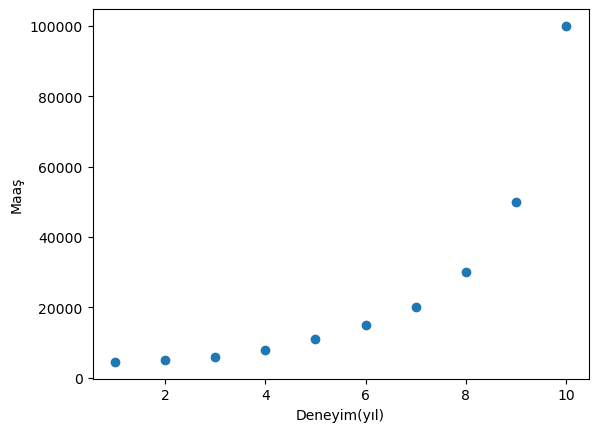

In [5]:
plt.scatter(df["Level"],df["Salary"]) #scatter graifkte noktaların oluşmasını sağlar parametre olarak x ekseni,y ekseni alır.
plt.xlabel("Deneyim(yıl)")
plt.ylabel("Maaş")
plt.savefig("1.png",dpi=300)
plt.show()

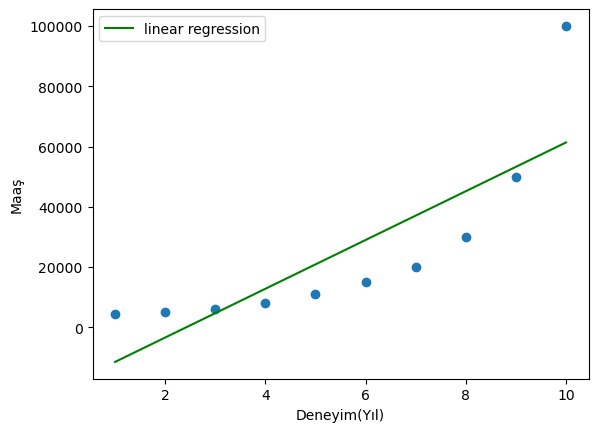

In [25]:
#görüldüğü gibi doğrusal bir yapıda dağılmıyor veriler
#eğer biz bu veri setine linear regression uygularsak hiç uygun olmayan bir tahmin çizgisi görürüz
reg=LinearRegression()
reg.fit(df[["Level"]],df["Salary"])

plt.xlabel("Deneyim(Yıl)")
plt.ylabel("Maaş")

plt.scatter(df["Level"],df["Salary"])
x=df["Level"]
y=reg.predict(df[["Level"]])
plt.plot(x,y,color="green",label="linear regression")
plt.legend()
plt.show()

### tahmin çok kötü. bu veri seti için lineer regresyon uygulamak doğru değilmiş. veri setine göre model seçilmeli. öncelikle verisetine hakim olunmalı ve bilinmeli

#### bir de polinomal regresyona bakalım

x değerimizi polinom yukarıdaki fonksiyona uyacak şekilde uyarlıyoruz
yani => 1,x,x^2 (n=2) şeklinde

In [26]:
#bir adet polynomail regression nesnesi oluşturalım
#bu fonksiyonu çağırırken polinomun derecesini(n) belirtiyoruz
polynomail_regression=PolynomialFeatures(degree=4)

x_polynomail=polynomail_regression.fit_transform(df[["Level"]])

In [27]:
#regression model nesnemizi olan reg nesnemizi oluşturup bunun fit metodunu çağırarak x_polynomail
#ve y eksenlerini fit ediyoruz
#yani regresyon modelni mevcut gerçek verilerle eğitiyoruz
reg=LinearRegression()
reg.fit(x_polynomail,df["Salary"])

LinearRegression()

### artık modelimiz hazır ve eğitilmiş,şimdi eldeki verilere göre modelimiz nasıl bir sonuç grafiği oluşturuyor onu görelim;

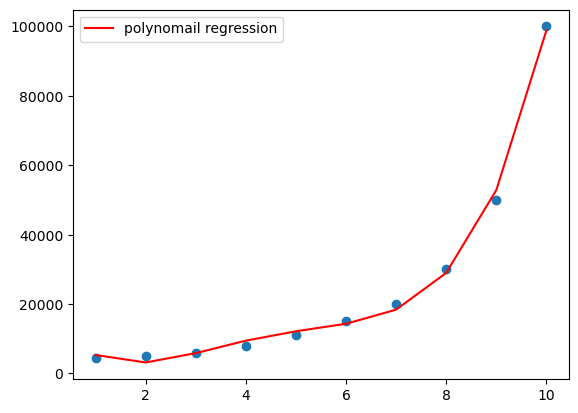

In [28]:
y_head =reg.predict(x_polynomail) #predicti,tahmin
plt.plot(df["Level"],y_head,color="red",label="polynomail regression") #kırmızı çizgi
plt.legend()
plt.scatter(df["Level"],df["Salary"]) #grafikteki noktalar
plt.show()

### artık 4.5 leveldeki elemanın maaşını tahmin ettirebiliriz 

In [29]:
x_polynomail1=polynomail_regression.fit_transform([[4.5]]) # iki boyutlu array istediği için iki tane köşeli parantez kullanılır
reg.predict(x_polynomail1)

array([10958.21496213])